# Lab | Imbalanced data

Instructions

1. Load the dataset and explore the variables.

2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

3. Extract the target variable.

4. Extract the independent variables and scale them.

5. Build the logistic regression model.

6. Evaluate the model.

7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?# Lesson 1 Key Concepts

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [4]:
churnData = pd.read_csv('/Users/martinez/Documents/data_3.09_activities/files_for_activities/csv_files/customer_churn.csv')
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data = churnData[['tenure','SeniorCitizen','MonthlyCharges']]
data

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [27]:
import numpy as np

churn = pd.DataFrame(churnData['Churn'])
display(churn)

churn = pd.DataFrame(np.where(churn['Churn'] == 'Yes',1,0))
churn.columns = ['Churn']
display(churn)

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


### Dataset shape

In [13]:
data.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [14]:
data.shape

(7043, 3)

### Data types of each column

In [15]:
data.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

### Checking for NA's

In [12]:
data.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64

### Filtering the dataset

In [60]:
data = data[data['duration'].isna() == False]

### Cheking again for NA's

In [61]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

### Getting the frequencies

In [16]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [17]:
data['SeniorCitizen'].value_counts()


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Checking for correlations

In [28]:
test = pd.concat([data,churn], axis=1, sort=False)
display(test)

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


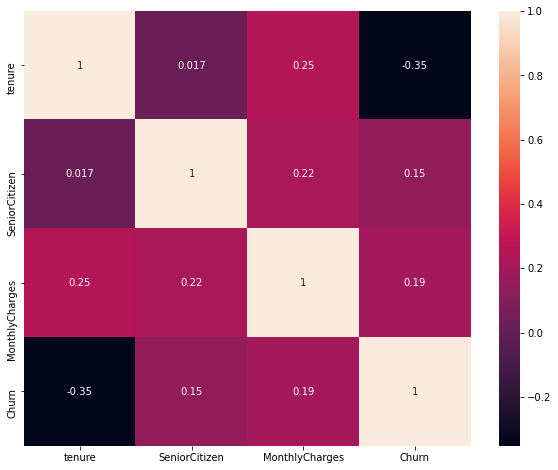

In [29]:
corr_matrix=test.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Checking the distributions of numerical columns

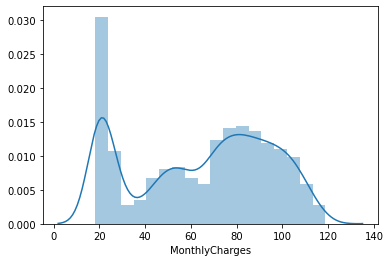

In [20]:
sns.distplot(data['MonthlyCharges'])
plt.show()

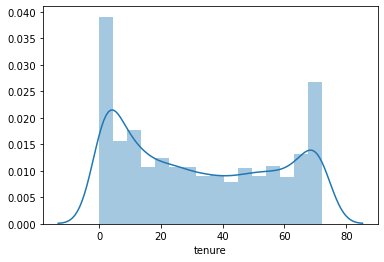

In [22]:
sns.distplot(data['tenure'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


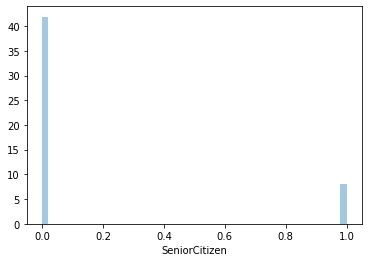

In [21]:
sns.distplot(data['SeniorCitizen'])
plt.show()

## Data preprocessing

In [30]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = test.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

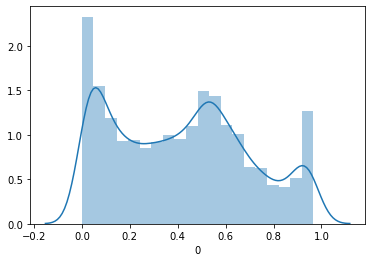

In [32]:
sns.distplot(x[0])
plt.show()

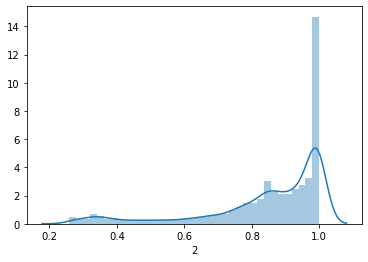

In [33]:
sns.distplot(x[2])
plt.show()

In [36]:
x=test[['tenure', 'SeniorCitizen','MonthlyCharges']]
y=test['Churn']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [38]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [40]:
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 1.00 


In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

transformer = StandardScaler().fit(data)
X = transformer.transform(data)
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [48]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [49]:
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.78 


In [50]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(data, y)
display(y_tl.value_counts())

X_tl2, y_tl2 = tl.fit_sample(X_tl, y_tl)
display(y_tl2.value_counts())

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


0    4711
1    1869
Name: Churn, dtype: int64

0    4575
1    1869
Name: Churn, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_tl2, y_tl2, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)

In [52]:
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.80 
